In [1]:
import numpy as np
import pandas as pd

In [2]:
import consts
import util

In [3]:
data = pd.read_csv('data/strawberry_samples_big.csv', index_col=0)
val_data = pd.read_csv('data/strawberry_val_dataset.csv', index_col=0)
data

,OVERALL LIKING,TEXTURE LIKING,SWEETNESS INTENSITY,SOURNESS INTENSITY,STRAWBERRY FLAVOR INTENSITY,6915-15-7,77-92-9,50-99-7,57-48-7,57-50-1,...,7786-58-5,15111-96-3,706-14-9,10522-34-6,5881-17-4,128-37-0,40716-66-3,4887-30-3,5454-09-1,2305-05-7
0,0.307068,0.250174,0.276647,0.146214,0.305021,-2.120421,0.171179,0.759180,0.612070,0.314374,...,-0.271610,-0.443110,-0.544167,-0.463164,1.289539,-0.945803,0.122098,-0.127048,0.804970,-0.354773
1,0.307859,0.249023,0.276101,0.147151,0.306364,-2.119978,0.171282,0.759195,0.612046,0.314378,...,-0.276743,-0.334642,-0.545464,-0.568225,1.346308,-0.893509,0.117186,-0.129998,0.800679,-0.374048
2,0.306348,0.248756,0.277115,0.146568,0.306719,-2.120063,0.171283,0.759176,0.612056,0.314430,...,-0.275587,-0.241669,-0.544872,-0.614111,1.283168,-0.997929,0.118824,-0.128236,0.819822,-0.357370
3,0.307694,0.248227,0.277607,0.147135,0.305276,-2.120058,0.171249,0.759163,0.612060,0.314365,...,-0.273644,-0.312912,-0.545357,-0.562826,1.343249,-0.959232,0.118201,-0.126724,0.811123,-0.377366
4,0.308055,0.249070,0.276638,0.145692,0.305707,-2.120678,0.171089,0.759154,0.612069,0.314420,...,-0.273092,-0.211367,-0.545153,-0.589017,1.548846,-0.901830,0.120083,-0.126749,0.807910,-0.384669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,0.237395,0.249785,0.205025,0.225081,0.258800,-0.222374,0.884429,-0.834332,-0.803436,-0.625512,...,-0.368228,-0.326611,-0.146165,-0.098112,0.032811,-0.408101,0.055410,-0.453151,-0.452553,-0.445544
53996,0.240068,0.250256,0.204477,0.226804,0.257519,-0.221809,0.884286,-0.834295,-0.803437,-0.625499,...,-0.394705,-0.280702,-0.155369,-0.551456,-0.262542,-0.313059,0.052135,-0.480896,-0.518157,-0.462789
53997,0.238440,0.249851,0.204574,0.224211,0.257632,-0.222039,0.884583,-0.834322,-0.803455,-0.625512,...,-0.390017,-0.316657,-0.159865,-0.542431,-0.189396,-0.153318,0.055373,-0.470802,-0.472719,-0.478549
53998,0.238959,0.250376,0.202495,0.225202,0.258081,-0.222588,0.884425,-0.834312,-0.803431,-0.625546,...,-0.372647,-0.229130,-0.157428,-0.625398,-0.242219,-0.471044,0.053125,-0.445828,-0.497520,-0.467094


In [4]:
target_cols = data.columns[:5]
target_cols

Index(['OVERALL LIKING', 'TEXTURE LIKING', 'SWEETNESS INTENSITY',
       'SOURNESS INTENSITY', 'STRAWBERRY FLAVOR INTENSITY'],
      dtype='object')

In [5]:
feature_cols = data.columns[5:]
feature_cols

Index(['6915-15-7', '77-92-9', '50-99-7', '57-48-7', '57-50-1', 'SSC', 'pH',
       'TA', '75-85-4 ', '616-25-1 ', '1629-58-9 ', '96-22-0 ', '110-62-3 ',
       '1534-08-3 ', '105-37-3', '109-60-4 ', '623-42-7 ', '591-78-6 ',
       '108-10-1 ', '1576-87-0 ', '1576-86-9 ', '623-43-8 ', '71-41-0',
       '1576-95-0 ', '556-24-1 ', '589-38-8 ', '105-54-4 ', '66-25-1 ',
       '123-86-4 ', '624-24-8 ', '29674-47-3 ', '96-04-8 ', '638-11-9 ',
       '116-53-0 ', '7452-79-1 ', '6728-26-3 ', '928-95-0 ', '111-27-3 ',
       '123-92-2 ', '624-41-9 ', '110-43-0', '2432-51-1 ', '105-66-8 ',
       '539-82-2 ', '111-71-7 ', '628-63-7 ', '1191-16-8 ', '106-70-7 ',
       '55514-48-2 ', '110-93-0 ', '109-21-7 ', '123-66-0 ', '124-13-0 ',
       '142-92-7 ', '2497-18-9 ', '60415-61-4', '104-76-7 ', ' 2311-46-8 ',
       '109-19-3 ', '2548-87-0 ', '540-18-1 ', '4077-47-8 ', '20664-46-4',
       '821-55-6 ', '5989-33-3 ', '78-70-6 ', '124-19-6 ', '103-09-3',
       '140-11-4 ', '2639-63-6 ', '53398-8

In [6]:
features = data[feature_cols].values
labels = data[target_cols].values
val_features = val_data[feature_cols].values
val_labels = val_data[target_cols].values
print(features.shape)
print(labels.shape)

(54000, 89)
(54000, 5)


In [7]:
NUM_SAMPLE_TYPES = 54
NUM_SAMPLES_PER_TYPE = len(data) // NUM_SAMPLE_TYPES
TEST_SIZE = 0.3
train_X = features[int(NUM_SAMPLE_TYPES*TEST_SIZE)*NUM_SAMPLES_PER_TYPE:]
train_y = labels[int(NUM_SAMPLE_TYPES*TEST_SIZE)*NUM_SAMPLES_PER_TYPE:]
val_X = val_features[:int(NUM_SAMPLE_TYPES*TEST_SIZE)]
val_y = val_labels[:int(NUM_SAMPLE_TYPES*TEST_SIZE)]

train_X.shape, train_y.shape, val_X.shape, val_y.shape

((38000, 89), (38000, 5), (16, 89), (16, 5))

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

# Define your MLP model
class MLP(nn.Module):
    def __init__(self, input_size, output_size, layer_size, num_hidden_layers):
        super(MLP, self).__init__()
        torch.manual_seed(consts.TORCH_MANUAL_SEED)
        self.fc_in = nn.Linear(input_size, layer_size)
        self.relu = nn.ReLU()
        self.hidden_fcs = nn.ModuleList([nn.Linear(layer_size, layer_size) for _ in range(num_hidden_layers)])
        self.fc_out = nn.Linear(layer_size, output_size)

    def forward(self, x):
        x = self.fc_in(x)
        x = self.relu(x)
        for fc in self.hidden_fcs:
            x = fc(x)
            x = self.relu(x)
        x = self.fc_out(x)

        return x

# Define custom PyTorch dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Define training function
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    return running_loss / len(train_loader.dataset)


def do_prediction(model, inputs, device):
    inputs = inputs.float().to(device)

    outputs = model(inputs)

    return outputs

In [73]:
num_hidden_layers = 5
layer_size = 128
lr = 0.001
weight_decay = 0.01
batch_size = 64
epochs = 10
curvature  = -1

In [74]:
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create DataLoader for training and validation
train_dataset = CustomDataset(train_X, train_y)
val_dataset = CustomDataset(val_X, val_y)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Initialize model, criterion, and optimizer
model = MLP(input_size=len(feature_cols), output_size=len(target_cols), layer_size=layer_size, num_hidden_layers=num_hidden_layers).to(device)

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

eval_stats = {'loss': {'train': [], 'val': []}, 'mae': {'train': [], 'val': []}}

for epoch in tqdm(range(epochs), desc="Epoch"):
    eval_stats['loss']['train'].append(train_model(model, train_loader, criterion, optimizer, device))
    eval_stats['loss']['val'].append(util.evaluate_loss(model, val_loader, criterion, device))

    eval_stats['mae']['train'].append(util.evaluate_mae(model, train_loader, device))
    eval_stats['mae']['val'].append(util.evaluate_mae(model, val_loader, device))

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {eval_stats['loss']['train'][-1]:.4f}, Val Loss: {eval_stats['loss']['val'][-1]:.4f}")


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10, Train Loss: 0.0033, Val Loss: 0.0025
Epoch 2/10, Train Loss: 0.0024, Val Loss: 0.0024
Epoch 3/10, Train Loss: 0.0023, Val Loss: 0.0025
Epoch 4/10, Train Loss: 0.0023, Val Loss: 0.0025
Epoch 5/10, Train Loss: 0.0023, Val Loss: 0.0025
Epoch 6/10, Train Loss: 0.0023, Val Loss: 0.0026
Epoch 7/10, Train Loss: 0.0023, Val Loss: 0.0025
Epoch 8/10, Train Loss: 0.0023, Val Loss: 0.0024
Epoch 9/10, Train Loss: 0.0023, Val Loss: 0.0025
Epoch 10/10, Train Loss: 0.0023, Val Loss: 0.0023


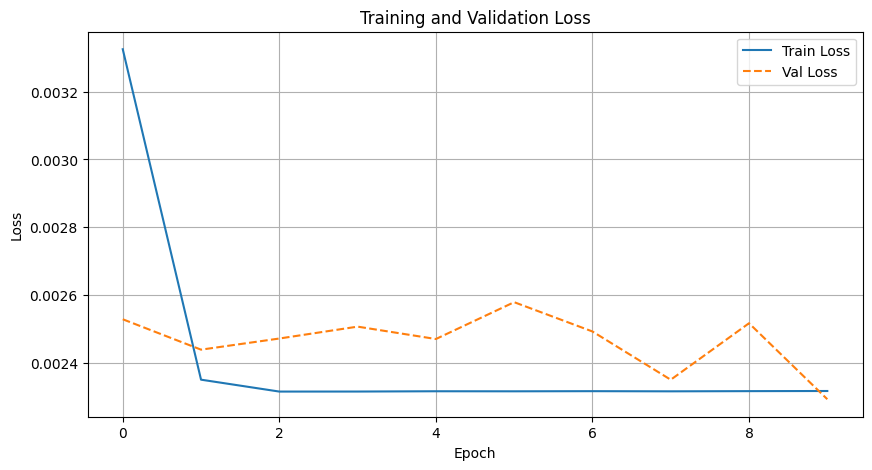

In [75]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), eval_stats['loss']['train'], label=f'Train Loss')
plt.plot(range(epochs), eval_stats['loss']['val'], label=f'Val Loss', linestyle='--')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
# plt.yscale('log')
plt.show()

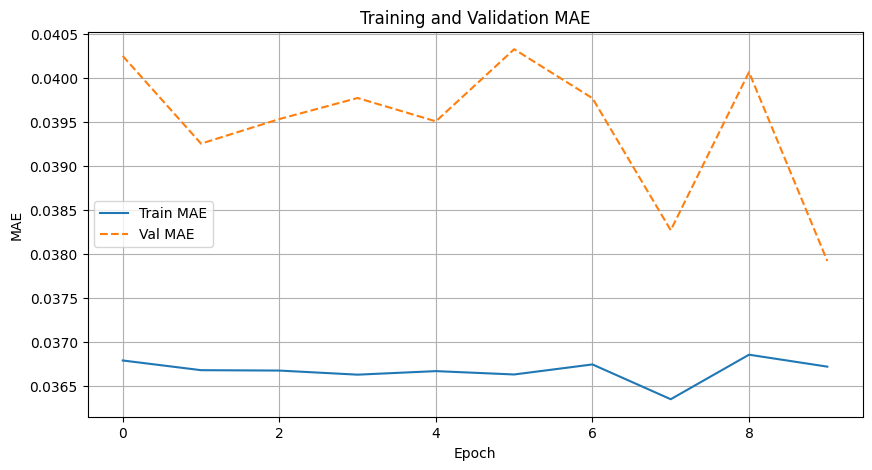

In [76]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), eval_stats['mae']['train'], label=f'Train MAE')
plt.plot(range(epochs), eval_stats['mae']['val'], label=f'Val MAE', linestyle='--')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
# plt.yscale('log')
plt.show()

In [77]:
preds = do_prediction(model, torch.tensor(val_X), device).detach().numpy()
preds

array([[0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.2234691 , 0.17611241, 0.26152515],
       [0.22660425, 0.22904035, 0.

In [78]:
# (np.abs(preds - val_y)).mean()
train_y.mean(axis=0)

array([0.22804235, 0.2334405 , 0.22464023, 0.18024144, 0.26436278])

In [79]:
val_y

array([[0.3075, 0.2489, 0.2772, 0.1468, 0.3058],
       [0.2634, 0.2639, 0.2366, 0.2124, 0.3005],
       [0.361 , 0.3571, 0.3034, 0.1787, 0.2427],
       [0.2249, 0.13  , 0.2758, 0.1587, 0.2861],
       [0.282 , 0.3039, 0.2457, 0.1839, 0.2827],
       [0.3185, 0.2461, 0.3101, 0.1727, 0.3348],
       [0.2776, 0.2773, 0.2476, 0.1907, 0.295 ],
       [0.3108, 0.2673, 0.2935, 0.1571, 0.322 ],
       [0.2877, 0.2763, 0.251 , 0.1723, 0.2809],
       [0.2605, 0.256 , 0.2068, 0.1946, 0.254 ],
       [0.213 , 0.1469, 0.2222, 0.1951, 0.2779],
       [0.1406, 0.1395, 0.1616, 0.1977, 0.2341],
       [0.2031, 0.2385, 0.1851, 0.1899, 0.2358],
       [0.2842, 0.2832, 0.2487, 0.1539, 0.2718],
       [0.2499, 0.2648, 0.226 , 0.2123, 0.2937],
       [0.2098, 0.2683, 0.1983, 0.1869, 0.2558]])

In [80]:
eval_stats['mae']['val']

[0.040246088,
 0.039251372,
 0.039529912,
 0.03976919,
 0.039504178,
 0.040322892,
 0.039766718,
 0.038268358,
 0.040062767,
 0.037919447]

num_hidden_layers = 5
layer_size = 128
lr = 0.001
weight_decay = 0.01
batch_size = 64
epochs = 10
curvature  = -1

0.037105955

Just goes to the means, usually 0.038